In [ ]:
#Modules for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import random
plt.style.use('fivethirtyeight')

#Modules for ML
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [ ]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BodyFat_-_Extended.csv")
df.shape

(434, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  434 non-null    float64
 1   Sex      434 non-null    object 
 2   Age      434 non-null    int64  
 3   Weight   434 non-null    float64
 4   Height   434 non-null    float64
 5   Neck     434 non-null    float64
 6   Chest    434 non-null    float64
 7   Abdomen  434 non-null    float64
 8   Hip      434 non-null    float64
 9   Thigh    434 non-null    float64
 10  Knee     434 non-null    float64
 11  Ankle    434 non-null    float64
 12  Biceps   434 non-null    float64
 13  Forearm  434 non-null    float64
 14  Wrist    434 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 51.0+ KB


In [ ]:
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
df['Age'] = df['Age'].astype(float)
df['BMI'] = df['Weight'] / (df['Height'] * df['Height'])
df['Density'] = 0.0026 * df['Sex'] - 0.0022 * df['BMI'] + 1.0605
df['BFP'] = -32.43547 + 0.80741 * df['BMI'] + 0.22019 * df['Hip'] + 0.22170 * df['Abdomen'] #body fat fitted equation

In [ ]:
df.describe()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,Density,BFP
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,20.281682,0.578341,34.610599,72.347327,1.734217,35.257143,94.209908,82.870737,98.684101,56.065899,37.374194,22.355300,29.905530,26.491014,17.145161,24.118560,1.008943,27.139792
std,7.449720,0.494394,15.449627,15.467127,0.098508,3.845655,10.927296,14.663891,6.879648,6.192623,2.768543,1.781346,3.951954,3.159843,1.583675,7.764367,0.016770,9.385394
min,0.700000,0.000000,18.000000,42.180000,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000,15.849796,0.699406,12.168536
25%,15.032500,0.000000,21.000000,59.880000,1.670000,31.500000,85.625000,70.000000,94.050000,51.500000,35.425000,21.050000,26.850000,23.700000,16.000000,21.163346,1.005571,21.513624
50%,20.500000,1.000000,28.500000,70.930000,1.730000,35.500000,93.100000,82.950000,98.300000,56.000000,37.500000,22.300000,29.800000,26.700000,17.350000,23.388159,1.010552,26.330856
75%,25.375000,1.000000,46.000000,81.620000,1.800000,38.300000,101.475000,93.275000,102.500000,60.000000,39.000000,23.300000,32.675000,29.200000,18.400000,25.960843,1.015234,31.508159
max,47.500000,1.000000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,165.315556,1.025630,149.597218


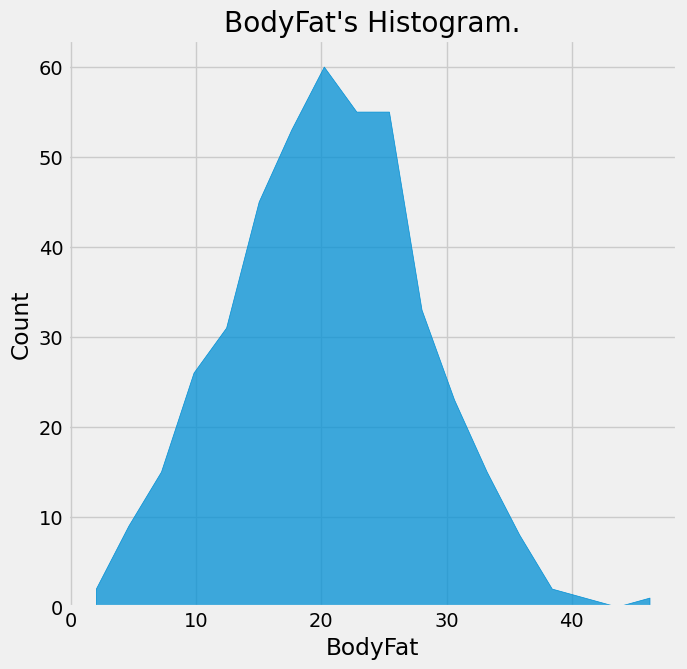

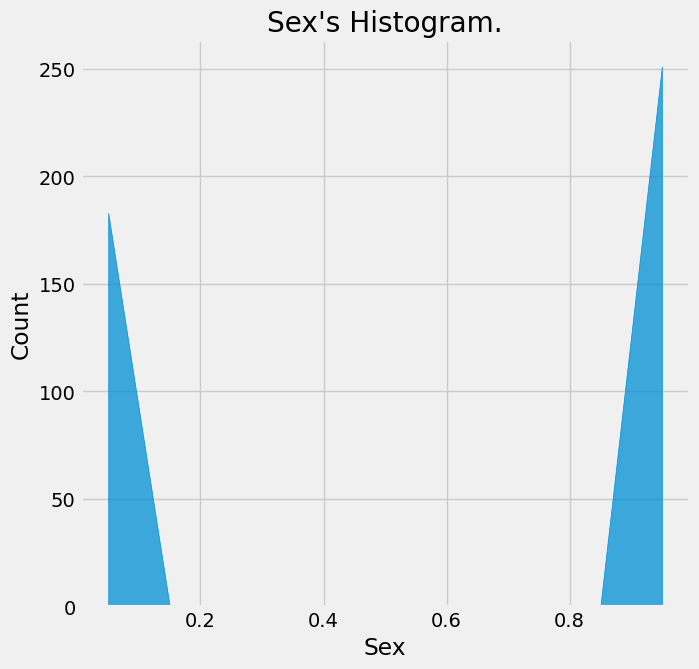

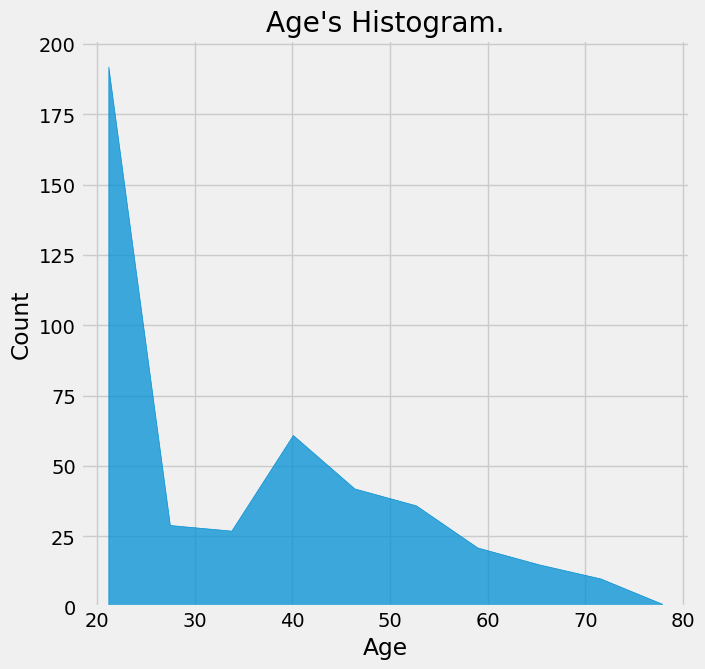

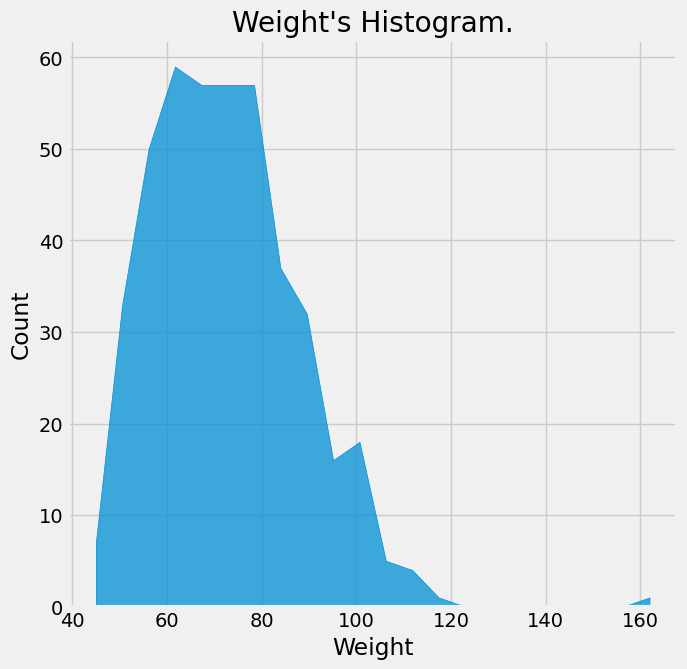

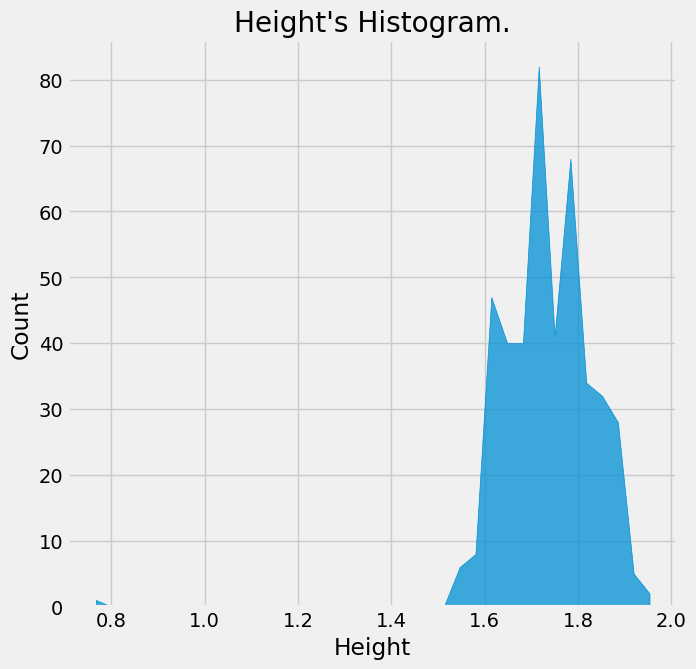

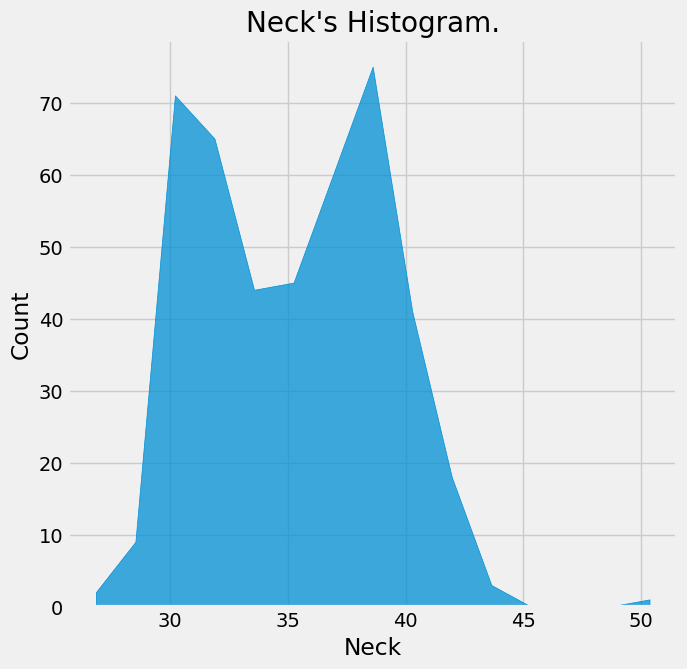

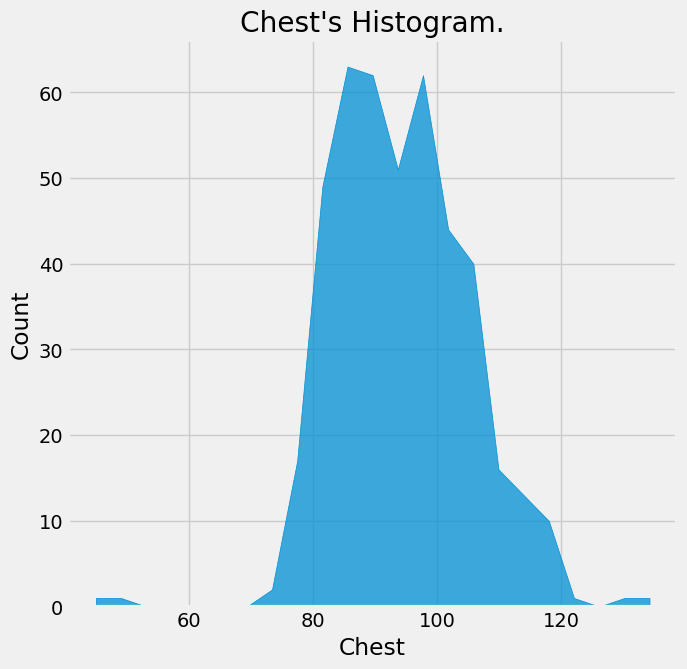

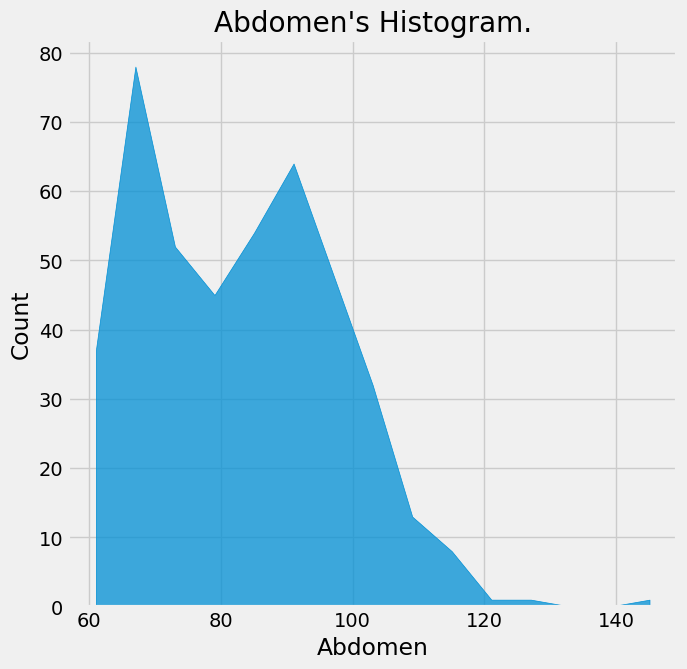

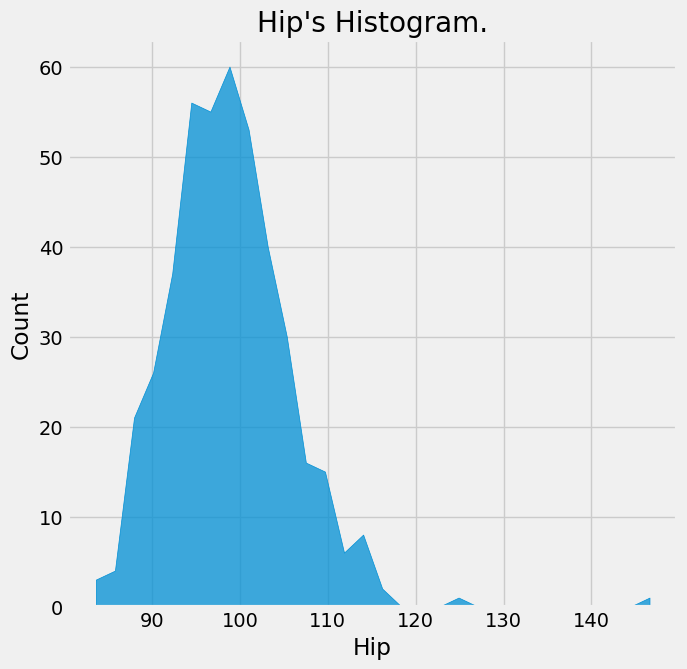

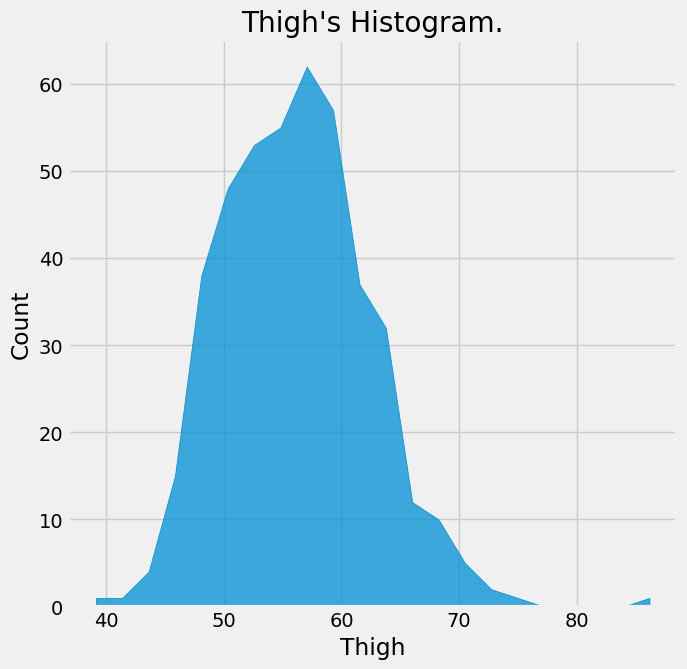

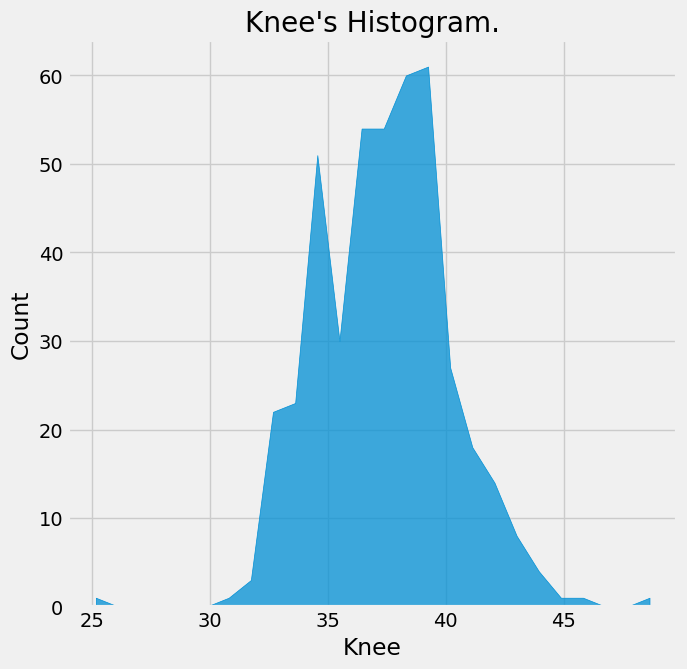

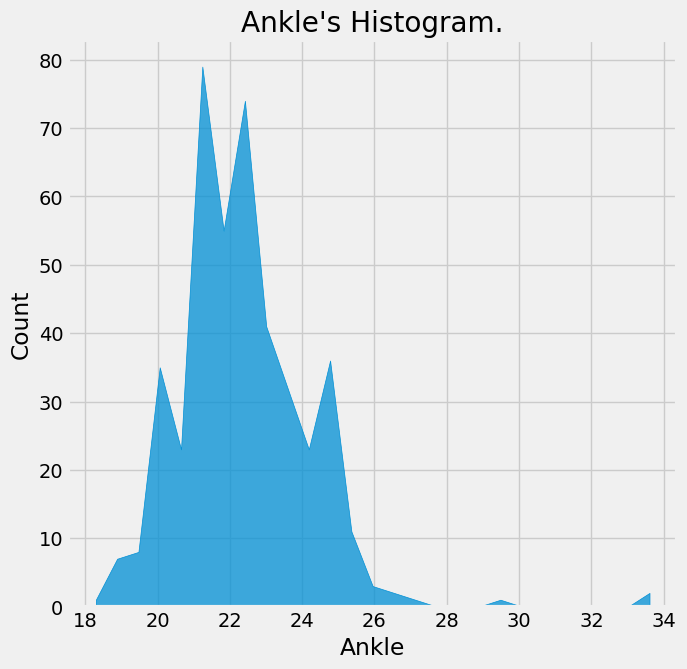

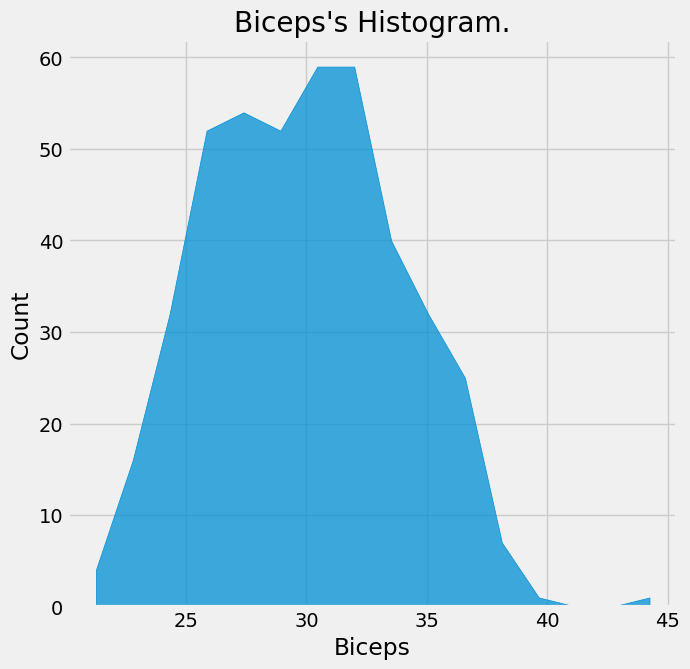

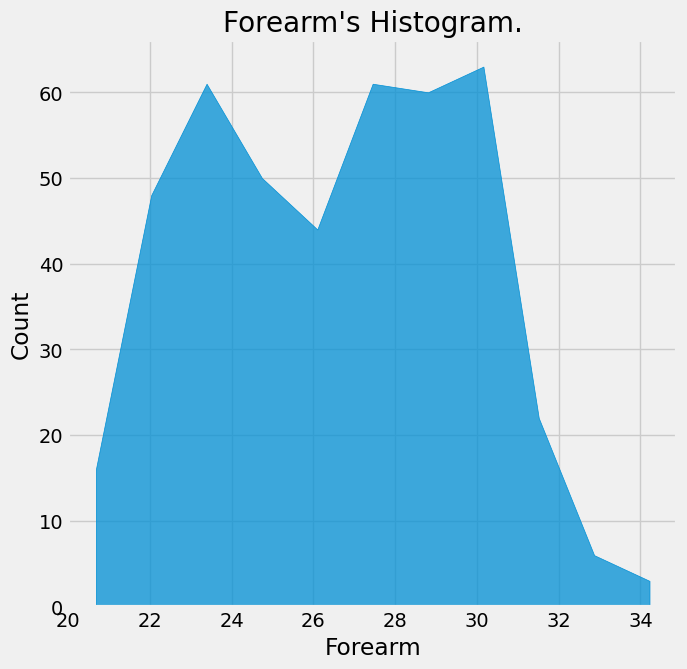

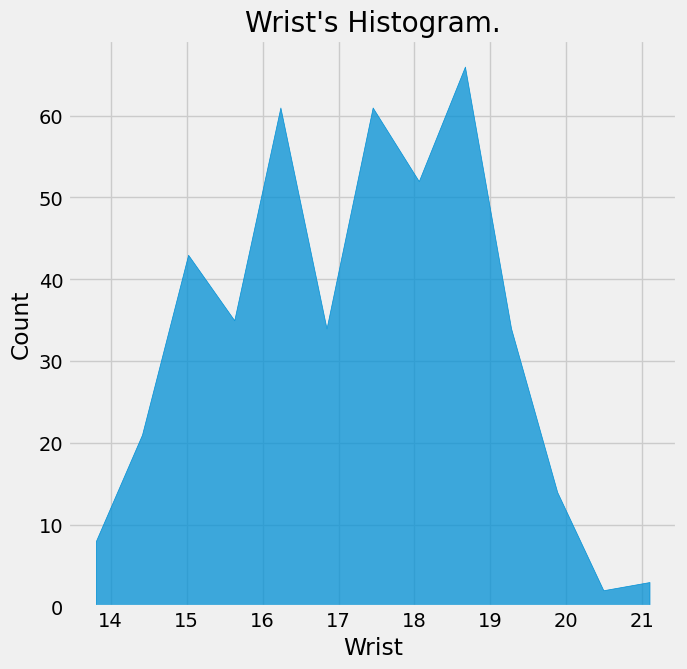

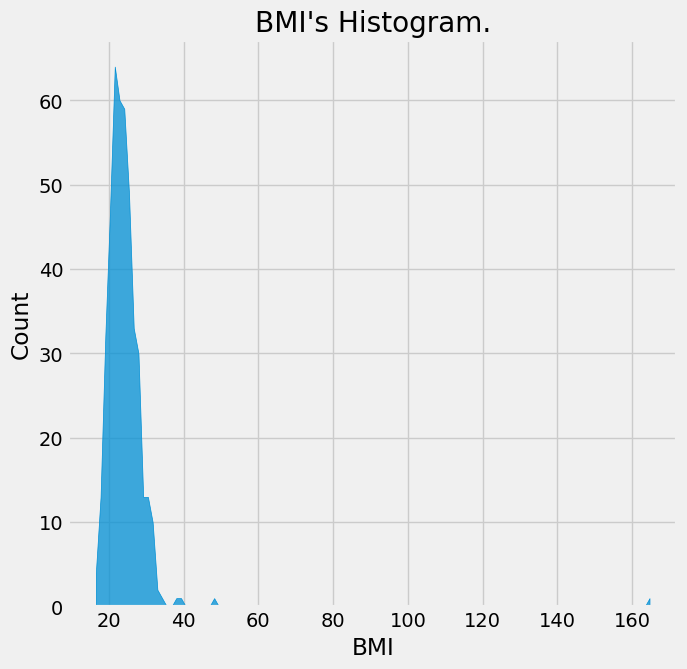

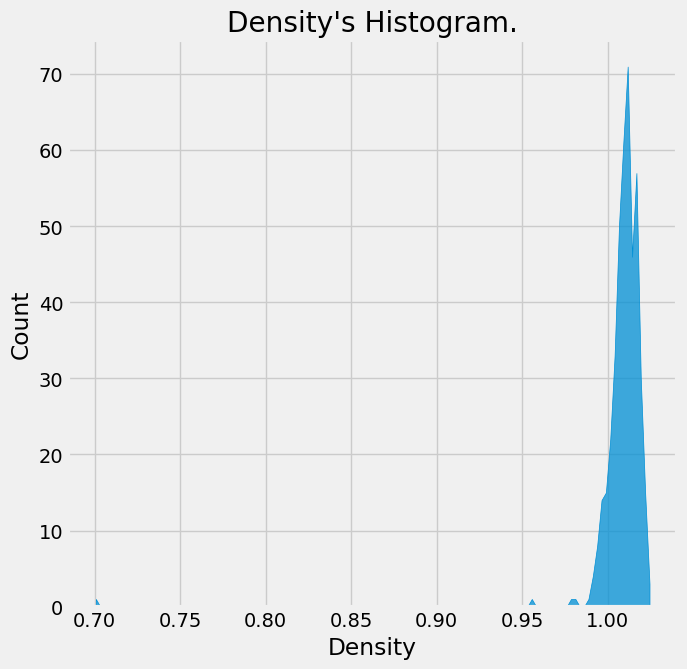

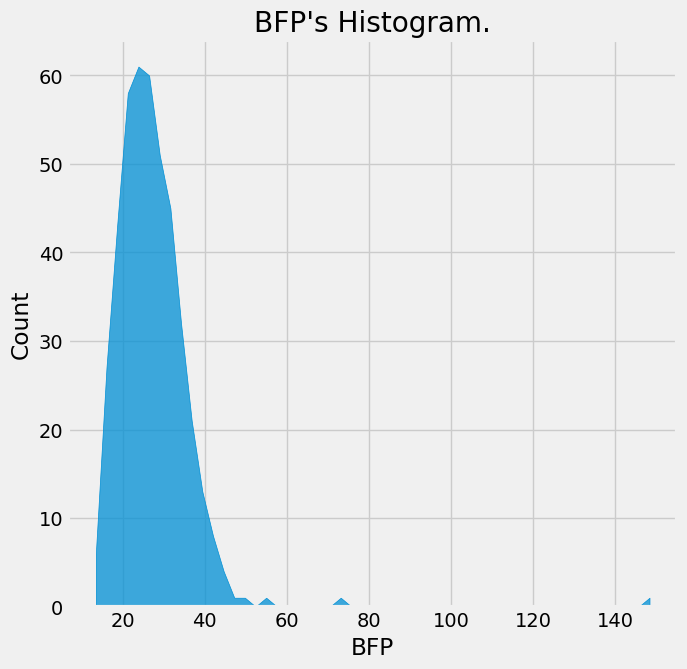

In [ ]:
columns = df.columns

for column in columns:
    plt.figure(figsize=(7,7))
    sns.histplot(data=df[[column]],x=column,element='poly')
    plt.title(f"{column}'s Histogram.")
    plt.show()

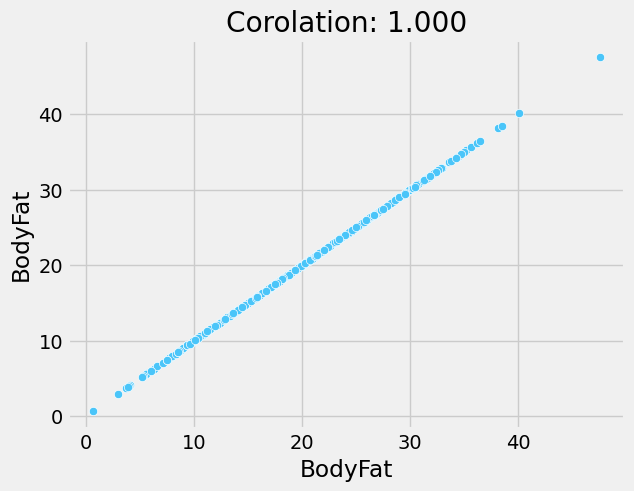

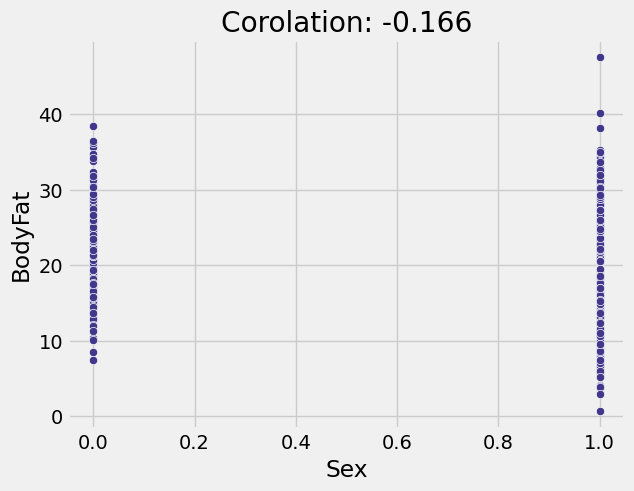

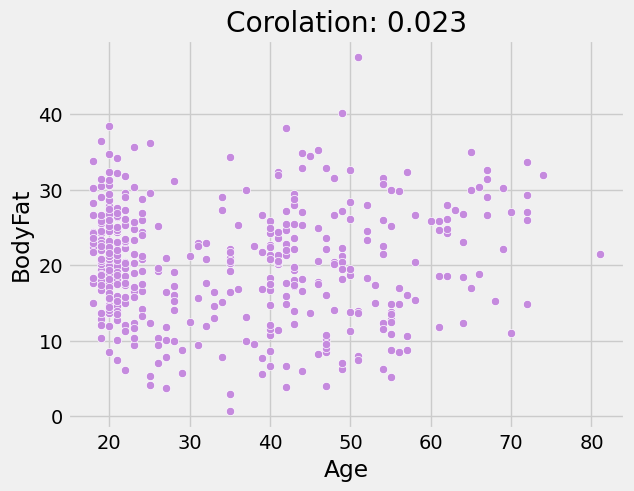

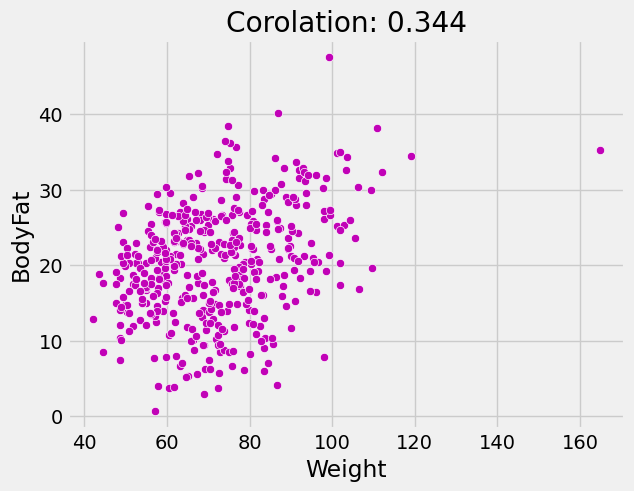

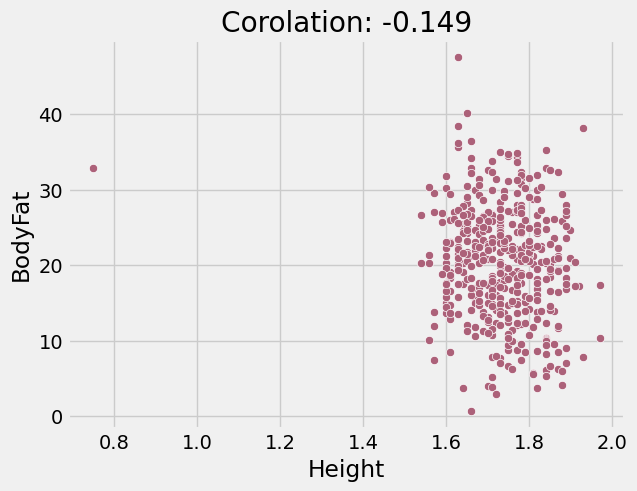

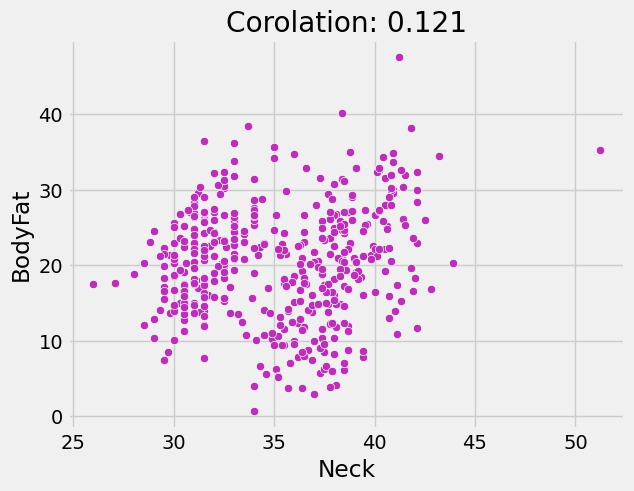

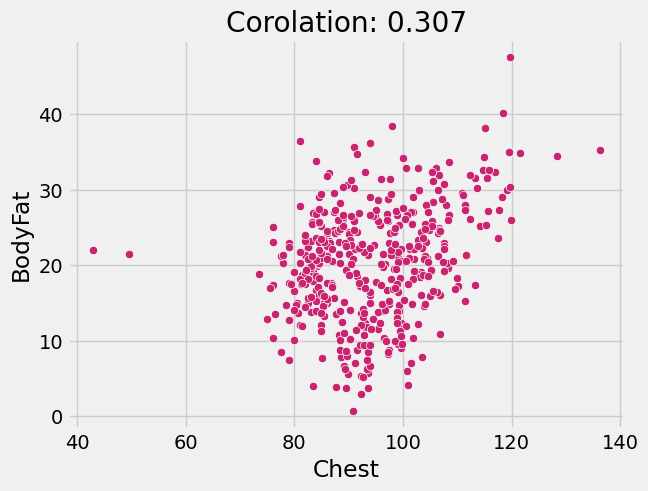

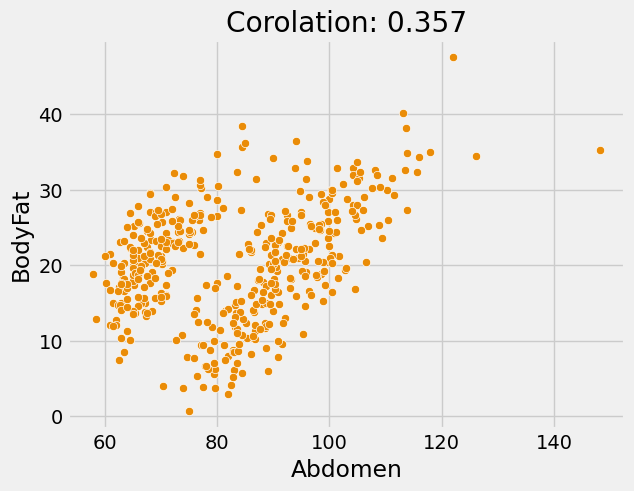

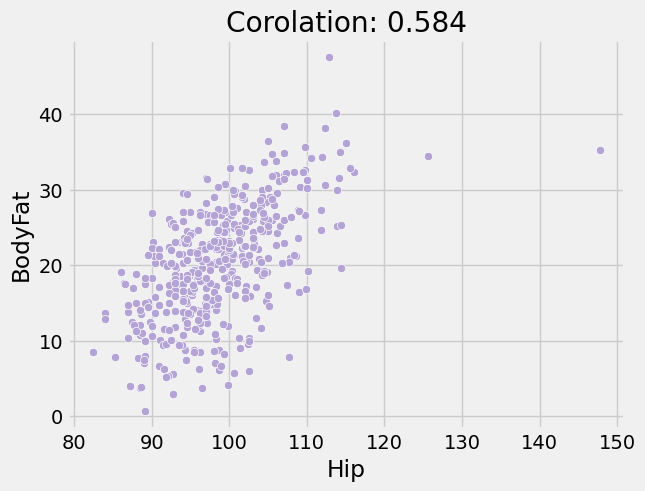

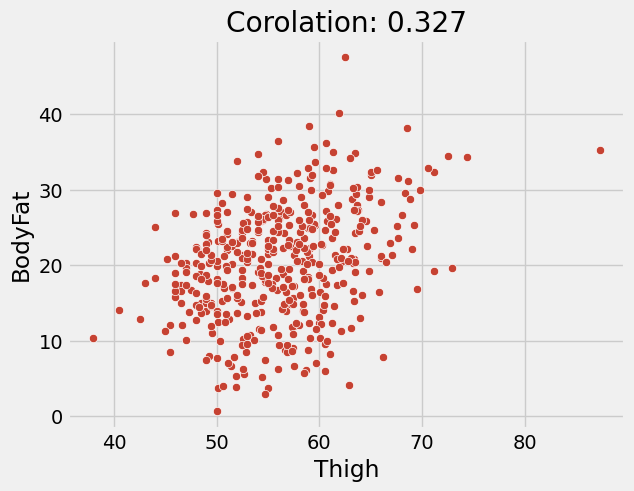

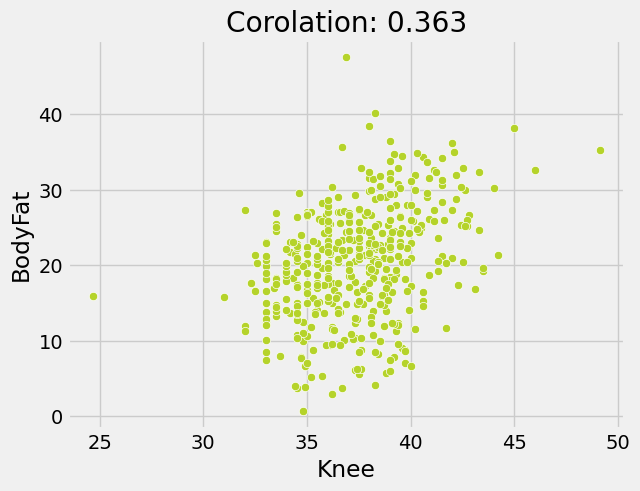

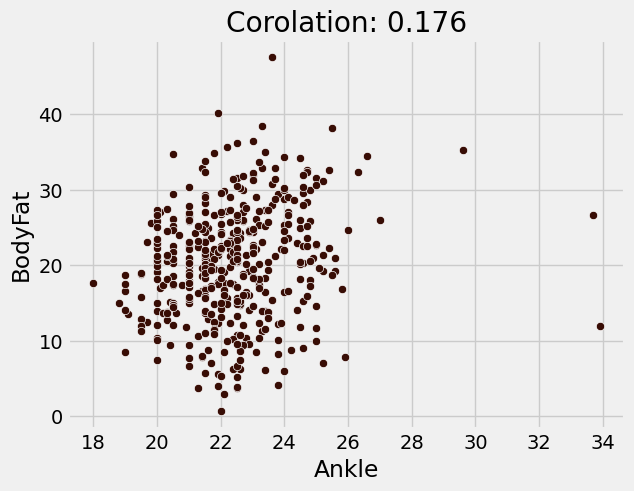

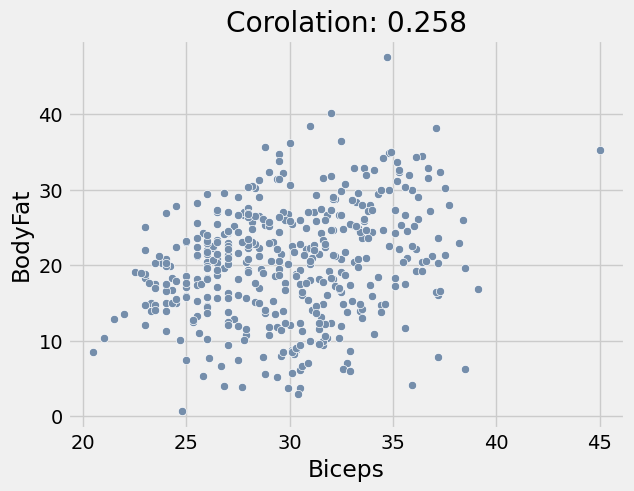

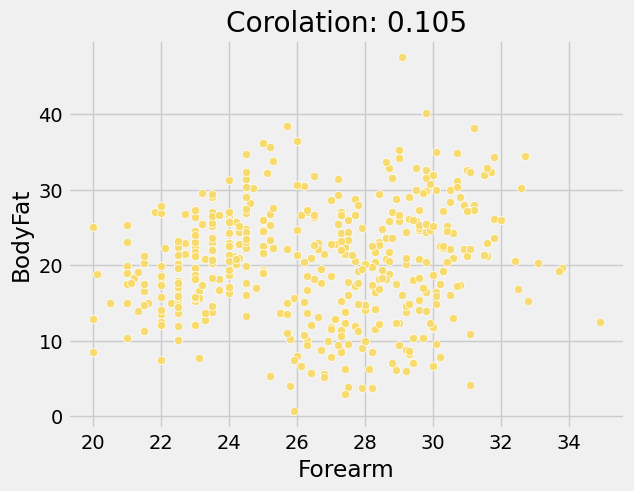

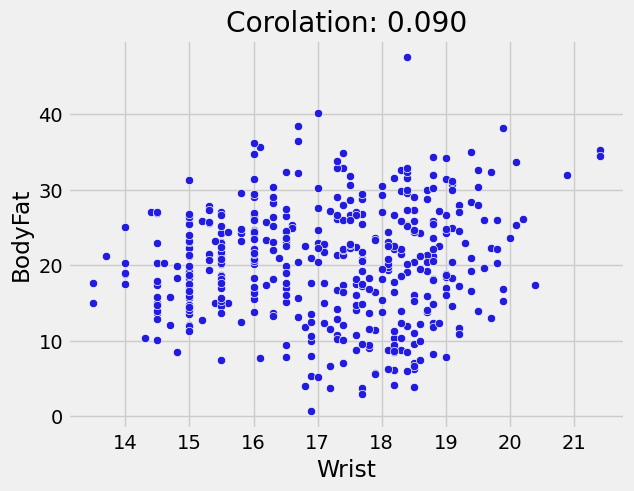

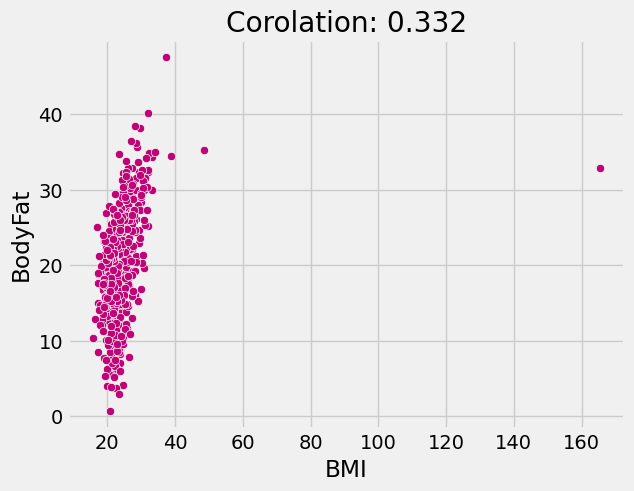

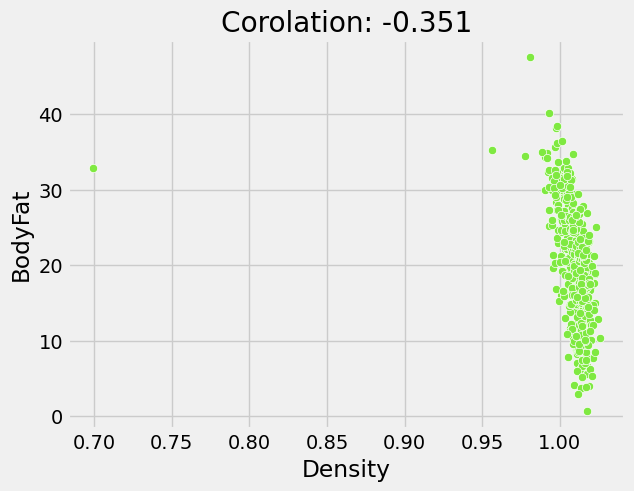

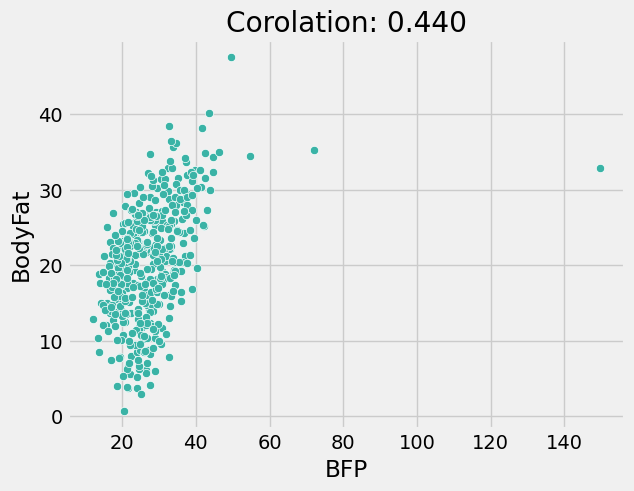

In [ ]:
columns = df.columns

for column in columns:
    corr, _ = pearsonr(df[column], df.BodyFat)
    sns.scatterplot(x=df[column], y = df.BodyFat, color = randomcolor())
    plt.title('Corolation: %.3f' % corr)
    plt.show()

In [ ]:
df = df.drop(['Sex', 'Age', 'Height', 'Neck', 'Ankle', 'Forearm', 'Wrist', 'Density'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  434 non-null    float64
 1   Weight   434 non-null    float64
 2   Chest    434 non-null    float64
 3   Abdomen  434 non-null    float64
 4   Hip      434 non-null    float64
 5   Thigh    434 non-null    float64
 6   Knee     434 non-null    float64
 7   Biceps   434 non-null    float64
 8   BMI      434 non-null    float64
 9   BFP      434 non-null    float64
dtypes: float64(10)
memory usage: 34.0 KB


In [ ]:
#scale = MinMaxScaler()
#scalled = scale.fit_transform(df)

In [ ]:
#columns = df.columns
#i = 0
#for col in columns:
#    df[col] = scalled[:,i]
#    i += 1

In [ ]:
df.head()

,BodyFat,Weight,Chest,Abdomen,Hip,Thigh,Knee,Biceps,BMI,BFP
0,12.3,69.97,93.1,85.2,94.5,59.0,37.3,32.0,23.651298,26.357620
1,6.1,78.59,93.6,83.0,98.7,58.7,37.3,30.5,23.213020,26.440807
2,25.3,69.85,95.8,87.9,99.2,59.6,38.9,28.8,24.748441,28.876947
3,10.4,83.80,101.8,86.4,101.2,60.1,37.3,32.4,24.751890,28.987562
4,28.7,83.58,97.3,100.0,101.9,63.2,42.2,32.2,25.512042,32.770569


In [ ]:
x, y = df.drop('BodyFat',axis=1), df['BodyFat']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((303, 9), (131, 9), (303,), (131,))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(9,input_shape=(9,),activation='linear'),
    keras.layers.Dense(10,activation='linear'),
    keras.layers.Dense(7,activation='linear'),
    keras.layers.Dense(3,activation='linear'),
    keras.layers.Dense(1,activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [ ]:
model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
10/10 [==============================] - 1s 3ms/step - loss: 5506.6201
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 1041.9518
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 116.3971
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 174.8775
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 130.9460
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 79.2428
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 79.0582
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 76.9681
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 73.0326
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 71.5948
Epoch 11/1000
10/10 [==============================] - 0s 2ms/step - loss: 69.7579
Epoch 12/1000
10/10 [==============================] - 0s 2ms/step - loss: 68.9172
Epoch 

In [ ]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 31.1335


31.133522033691406

In [ ]:
def predict(model,x):
    pred = model.predict(x).flatten()
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    plt.figure(figsize=(7,7))
    plt.scatter(y_true,y_pred)

    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

5/5 [==============================] - 0s 3ms/step


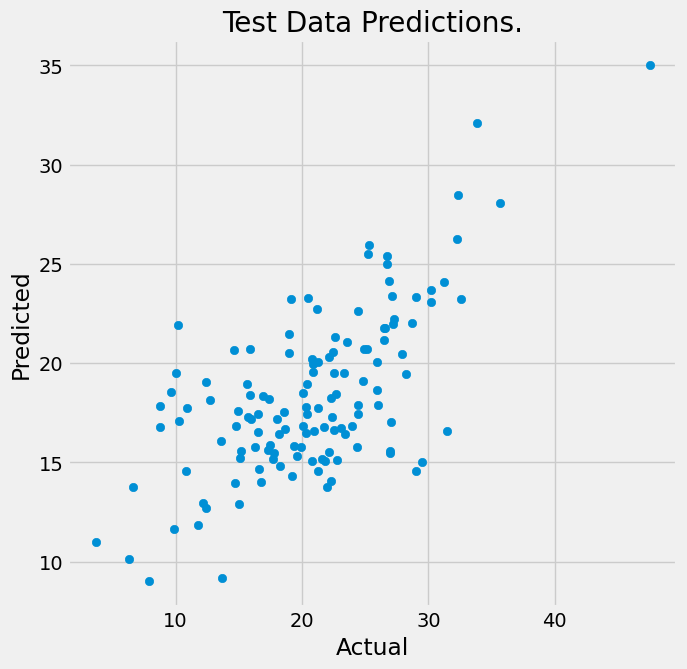

In [ ]:
y_test_predict = predict(model, x_test)
plot_actual_vs_predicted(y_test, y_test_predict,'Test Data Predictions.')

In [ ]:
test_rmse = mean_squared_error(y_test,y_test_predict) ** (1/2)
test_rmse

5.57974204722911

In [ ]:
test_data = pd.DataFrame({'Test Actual':y_test,'Test Predicted':y_test_predict})
test_data.corr()

,Test Actual,Test Predicted
Test Actual,1.00000,0.66646
Test Predicted,0.66646,1.00000


In [ ]:
test_data.sample(10)

,Test Actual,Test Predicted
14,22.10,15.495590
20,19.10,23.222403
281,20.28,16.472614
48,13.60,16.091866
319,22.63,21.301760
113,21.30,20.068857
90,20.50,23.292736
372,16.28,15.778609
343,21.72,16.757458
366,18.98,20.524361


In [ ]:
r2_score(y_test, y_test_predict)

0.3206241574252171

10/10 [==============================] - 0s 3ms/step


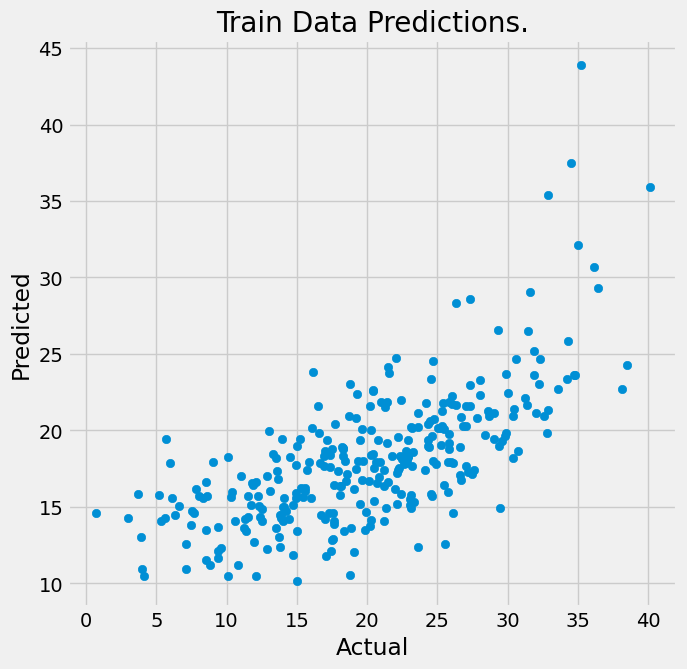

In [ ]:
y_train_predict = predict(model, x_train)
plot_actual_vs_predicted(y_train, y_train_predict,'Train Data Predictions.')

In [ ]:
train_rmse = mean_squared_error(y_train,y_train_predict) ** (1/2)
train_rmse

5.99429478617592

In [ ]:
train_data = pd.DataFrame({'Train Actual':y_train,'Train Predicted':y_train_predict})
train_data.corr()

,Train Actual,Train Predicted
Train Actual,1.00000,0.68579
Train Predicted,0.68579,1.00000


In [ ]:
train_data.sample(10)

,Train Actual,Train Predicted
298,32.23,23.028042
276,20.21,21.598961
308,23.28,18.602385
330,22.88,18.281715
101,20.40,18.465443
82,18.40,18.014410
207,9.60,12.280263
17,22.90,18.335180
110,19.70,17.966845
370,20.70,16.537760


In [ ]:
r2_score(y_train,y_train_predict)

0.39480104907423175

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/bodyfatann/annmodel.keras")

In [ ]:
sex = 1
age = 21
weight = 93.4
height = 1.825
neck = 38.3
chest = 104
abdomen = 93
hip = 70
thigh = 45
knee = 26
ankle = 35
biceps = 35
forearm = 30
wrist = 20
bmi = 27.6
density = 0.0026 * bmi - 0.0022 * bmi + 1.060
bfp = -32.43547 + 0.80741 * bmi + 0.22019 * hip + 0.22170 * abdomen #body fat fitted equation
bodyfat = bfp

user_details = [bodyfat, sex, age, weight, height, neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, wrist, bmi, density, bfp]

temp_tp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BodyFat_-_Extended.csv")
temp_tp['Sex'] = temp_tp['Sex'].map({'M':1, 'F':0})
temp_tp['Age'] = temp_tp['Age'].astype(float)
temp_tp['BMI'] = temp_tp['Weight'] / (temp_tp['Height'] * temp_tp['Height'])
temp_tp['Density'] = 0.0026 * temp_tp['Sex'] - 0.0022 * temp_tp['BMI'] + 1.0605
temp_tp['BFP'] = -32.43547 + 0.80741 * temp_tp['BMI'] + 0.22019 * temp_tp['Hip'] + 0.22170 * temp_tp['Abdomen'] #body fat fitted equation

temp_tp.loc[len(df.index)] = user_details
temp_tp


#scale = MinMaxScaler()
#scalled = scale.fit_transform(temp_tp)
#
#i = 0
#for col in columns:
#    temp_tp[col] = scalled[:,i]
#    i += 1

temp_tp.head()
temp_tp = temp_tp.drop('BodyFat', axis=1)
temp_tp = temp_tp.drop(['Sex', 'Age', 'Height', 'Neck', 'Ankle', 'Forearm', 'Wrist', 'Density'], axis=1)


user_details_scaled = temp_tp.loc[len(temp_tp.index)-1]
print(user_details_scaled)
#user_details_scaled = pd.DataFrame(user_details_scaled)


print("Your Body fat percentage is: ", model.predict(temp_tp[:434])[433], "%")

Weight      93.400000
Chest      104.000000
Abdomen     93.000000
Hip         70.000000
Thigh       45.000000
Knee        26.000000
Biceps      35.000000
BMI         27.600000
BFP         25.880446
Name: 434, dtype: float64
14/14 [==============================] - 0s 4ms/step
Your Body fat percentage is:  [12.854201] %


In [ ]:
#testing to see loading of model

ann_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/bodyfatann/annmodel.keras')

print("Your Body fat percentage is: ", ann_model.predict(temp_tp[:434])[433], "%")

# BodyFat Sex  Age  Weight  Height  Neck  Chest  Abdomen  Hip   Thigh  Knee  Ankle  Biceps  Forearm  Wrist
#   12.3   M   23   69.97    1.72  36.2   93.1     85.2   94.5   59.0  37.3   21.9    32.0     27.4   17.12

14/14 [==============================] - 0s 2ms/step
Your Body fat percentage is:  [12.854201] %
